In [1]:
# importing library for reading and manipulating the data: 

import pandas as pd

pd.set_option('display.max_rows', None) # For displaying all the rorws of data without any truncation

In [2]:
# reading the csv file & storing it in the variable dataset:

dataset = pd.read_csv('Tenovia_DataSet_for_Customers.csv')

In [3]:
# Exploring the first 5 rows of the dataset :

dataset.head()

,CustomerID,Gender,Age,Annual Income (INR),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Exploring the column names, their count & data-type of each column :

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (INR)     200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# creating a 'Gender_encoded' column using Gender Column to represent gender in a categorical fashion 0,1 :

dataset['Gender_encoded'] = pd.get_dummies(dataset.Gender, drop_first=True)

In [6]:
dataset.head()  # 1 : Male , 0 : Female

,CustomerID,Gender,Age,Annual Income (INR),Spending Score (1-100),Gender_encoded
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [7]:
'''Choosing the columns for data analysis : Age, Annual Income, Spending Score, Gender_encoded 
   & thus dropping the column CustomerID & Gender'''

dataset.drop(columns=['CustomerID', 'Gender'], axis=1, inplace=True)

In [8]:
dataset.head()

,Age,Annual Income (INR),Spending Score (1-100),Gender_encoded
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [9]:
# importing libraries for visualization

import seaborn as sns
from matplotlib import pyplot as plt

<Figure size 7200x7200 with 0 Axes>

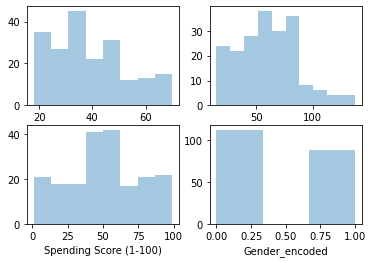

In [10]:
# Exploring the distribution of each column variable : 


plt.figure(figsize=(100,100))
plt.subplots(2,2)

plt.subplot(2,2,1)
sns.distplot(dataset['Age'],kde=False)

plt.subplot(2,2,2)
sns.distplot(dataset['Annual Income (INR)'],kde=False)

plt.subplot(2,2,3)
sns.distplot(dataset['Spending Score (1-100)'],kde=False)

plt.subplot(2,2,4)
sns.distplot(dataset['Gender_encoded'],kde=False)

plt.show()

In [11]:
'''Each variable : Age, Annual Income, Spending score, Gender are on different scale. Before applying any algorithm 
to this dataset we must scale down the entire dataset to a normalized scale '''

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dataset)
dataset_normalized = scaler.transform(dataset)

In [12]:
# Now, Time for clustering the customers using KMeans Algorithm :

In [13]:
from sklearn.cluster import KMeans

In [14]:
# Choosing the optimal number of clusters using elbow criterion method :

# Fitting KMeans and calculate SSE(Sum of squared error) for each 'k'(number of clusters)
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(dataset_normalized)
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster center

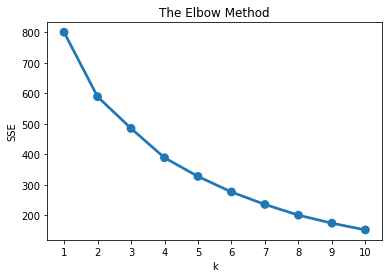

In [15]:
# Plotting SSE for each 'k'

plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [16]:
# The above plot suggests that the optimal number of cluster to be chosen is 4

In [17]:
# Instantiating the model by specifying the number of clusters

kmeans = KMeans(n_clusters=4)

In [18]:
kmeans.fit(dataset_normalized)

KMeans(n_clusters=4)

In [19]:
cluster_number = kmeans.labels_

In [20]:
cluster_number # represents the cluster_number mapped to each Customer Id

array([2, 2, 0, 1, 0, 1, 0, 1, 3, 1, 3, 1, 0, 1, 3, 2, 0, 2, 3, 1, 3, 2,
       0, 2, 0, 2, 0, 2, 0, 1, 3, 1, 3, 2, 0, 1, 0, 1, 0, 1, 0, 2, 3, 1,
       0, 1, 0, 1, 1, 1, 0, 2, 1, 3, 0, 3, 0, 3, 1, 3, 3, 2, 0, 0, 3, 2,
       0, 0, 2, 1, 3, 0, 0, 0, 3, 2, 0, 3, 1, 0, 3, 2, 3, 0, 1, 3, 0, 1,
       1, 0, 0, 2, 3, 0, 1, 2, 0, 1, 3, 2, 1, 0, 3, 2, 3, 1, 0, 3, 3, 3,
       3, 1, 0, 2, 1, 1, 0, 0, 0, 0, 2, 0, 1, 2, 1, 1, 3, 2, 3, 2, 3, 2,
       1, 1, 3, 1, 0, 2, 3, 1, 0, 2, 1, 1, 3, 2, 3, 1, 0, 2, 3, 2, 0, 1,
       0, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 0, 2, 3, 2, 3, 2, 0, 1,
       3, 2, 3, 2, 0, 1, 3, 1, 0, 2, 0, 2, 0, 1, 0, 1, 3, 1, 0, 1, 0, 2,
       3, 2])

In [21]:
# Creating a Column "Cluster_Assigned" using cluster_number & assigning it to our Parent Dataset :

dataset = dataset.assign(Cluster_Assigned= cluster_number)

In [22]:
# sorting the entire datset basis the Cluster_Assigned in ascending order :

dataset.sort_values(by='Cluster_Assigned')

,Age,Annual Income (INR),Spending Score (1-100),Gender_encoded,Cluster_Assigned
63,54,47,59,0,0
67,68,48,48,0,0
66,43,48,50,0,0
117,49,65,59,0,0
62,67,47,52,0,0
168,36,87,27,0,0
118,51,67,43,0,0
119,50,67,57,0,0
56,51,44,50,0,0
136,44,73,7,0,0


In [23]:
# Fetching the count of customer in each cluster : 
dataset.groupby('Cluster_Assigned')['Cluster_Assigned'].count()

Cluster_Assigned
0    56
1    56
2    40
3    48
Name: Cluster_Assigned, dtype: int64

<AxesSubplot:ylabel='Frequency'>

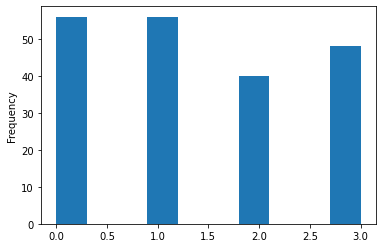

In [24]:
# Visualizing the customer-count ,cluster-wise : 
dataset.Cluster_Assigned.plot(kind='hist')

In [25]:
# Fetching the mean age, mean annual income, mean spending score of each cluster :  
dataset.groupby(['Cluster_Assigned']).agg({'Age': 'mean',
                                                 'Annual Income (INR)': ['mean'],
                                                 'Spending Score (1-100)': ['mean']}).round(0)

,Age,Annual Income (INR),Spending Score (1-100)
,mean,mean,mean
Cluster_Assigned,,,
0,48.0,58.0,35.0
1,28.0,60.0,68.0
2,28.0,62.0,72.0
3,49.0,62.0,29.0
